Add
- Overview/Content of Notebook
- How to use a notebook

## ML Overview

## Data Preprocessing
- Missing Data 
	- Just mention this, don't go into detail. Very dataset specific, lots of good resources available.
- Categorial Features
- Label Encoding
- Standardisation & Normalisation

### Missing Data
- Very important to check if there is missing data and handle this. Potential to break models (silently and non-silently).
- Handling is dataset specific
- Add resources links for this 

### Standardisation & Normalisation

Normalisation is important bla

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(42)

In [ ]:
from ml_nb_code import feature_scaling
feature_scaling()

Z-standardistaion: $\frac{X - \mu} {\sigma}$

This makes the data have zero mean and unit variance

In [ ]:
from ml_nb_code import feature_scaling_example
feature_scaling_example()

Can either use sklearn or do it manually

In [ ]:
# Manually
from ml_nb_code import get_fs_data
df = get_fs_data()

df["x1_norm"] = (df["x1"] - df["x1"].mean()) / df["x1"].std()
df["x2_norm"] = (df["x2"] - df["x2"].mean()) / df["x2"].std()

print(f"Mean: {df['x1_norm'].mean()}, Std: {df['x1_norm'].std()}")
print(f"Mean: {df['x2_norm'].mean()}, Std: {df['x2_norm'].std()}")

In [ ]:
# Using sklearn
from ml_nb_code import get_fs_data
from sklearn.preprocessing import StandardScaler
df = get_fs_data()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (i.e. calculate the mean and standard deviation)
scaler.fit(df[["x1", "x2"]])

# Transform the data
df[["x1_norm", "x2_norm"]] = scaler.transform(df[["x1", "x2"]])

# Can combine the fit and transform steps
# df[["x1_norm", "x2_norm"]] = scaler.fit_transform(df[["x1", "x2"]])

print(f"Mean: {df['x1_norm'].mean()}, Std: {df['x1_norm'].std()}")
print(f"Mean: {df['x2_norm'].mean()}, Std: {df['x2_norm'].std()}")

### Categorial Features/Inputs

TODO: Change both categorial and label encoding to use the dataset used for the decision tree concepts.


In [ ]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'Type': ['Resid', 'Comm', 'Indus', 'Resid', 'Indus', 'Comm']})
df

In [ ]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
encoded_data = encoder.fit_transform(df)

# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Type']), dtype=int)
# Concatenate the original and encoded dataframes
result_df = pd.concat([df, encoded_df], axis=1)
result_df

## Label encoding
Similarly to model inputs, most model also require the target target variable to be numerical. This is generally done using label encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data=np.arange(15).reshape(5, 3), columns=["Feature1", "Feature2", "Feature2"])
df["Target"] = ["Safe", "Unsafe", "Safe", "Safe", "Unsafe"]
df

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the data
df["Target_encoded"] = label_encoder.fit_transform(df["Target"])
df

In [ ]:
# Inverse transform (do we need to show this here? or move to separate coding notebook)
df["Target_2"] = label_encoder.inverse_transform(df["Target_encoded"])
df

## Model Fitting
- Decision Tree
    - Interactive example
    - Sklearn example (Hands on)
    - Visualisation   
- Overfitting/Underfitting

### Decision Tree Concepts

In [ ]:
from ml_nb_code import decision_tree
decision_tree()
# TASK 1
# move the top slider to divide the dataset, trying both features
# try to separate the safe and unsafe bridges as much as possible
# when you are satisfied with the split of data, check the box to lock the root node

# TASK 2
# repeat the exercise for the lefthand and righthand sliders below
# further separate and subdivide the data, trying to distinguish the two binary classes
# can you construct a decision tree that classifies the two bridge types based on their features?

# Consider the original dataframe given in the cells above. Which part is the feature matrix X, and
# which is the label vector y?
# What are the parameters of this model? What are the hyperparameters?

# TASK 3
# Suppose you are given a new bridge: load_capacity of 45, steel, and 10 years old. What would your model predict?

### Descision Tree (Hands on)
Consider the Iris dataset, bla, bla, classify bla  
Complete the cells marked with TODO to train a decision tree classifier on the iris dataset

TODO: Add short description of dataset

In [ ]:
### Import relevant libraries and load the data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from ml_nb_code import load_iris_df
iris_df, iris_feature_names = load_iris_df()
iris_df

In [20]:
## Hands-On - Prepare the data


### Solution

# Normalise the features
std_scaler = StandardScaler()
iris_df[iris_feature_names] = std_scaler.fit_transform(iris_df[iris_feature_names])

# Encode the labels
label_encoder = LabelEncoder()
iris_df["target_encoded"] = label_encoder.fit_transform(iris_df["target"])

Accuracy: 1.00


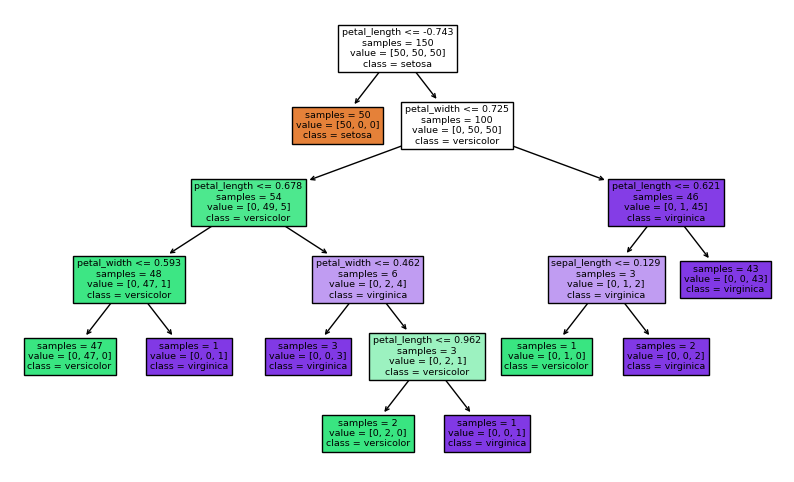

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(iris_df[iris_feature_names], iris_df["target_encoded"])

# Get model predictions
y_pred = clf.predict(iris_df[iris_feature_names])

# Calculate accuracy
accuracy = accuracy_score(iris_df["target_encoded"], y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, impurity=False, feature_names=iris_feature_names, class_names=label_encoder.inverse_transform(clf.classes_))
plt.show()

Note: Left corresponds to True, Right corresponds to False

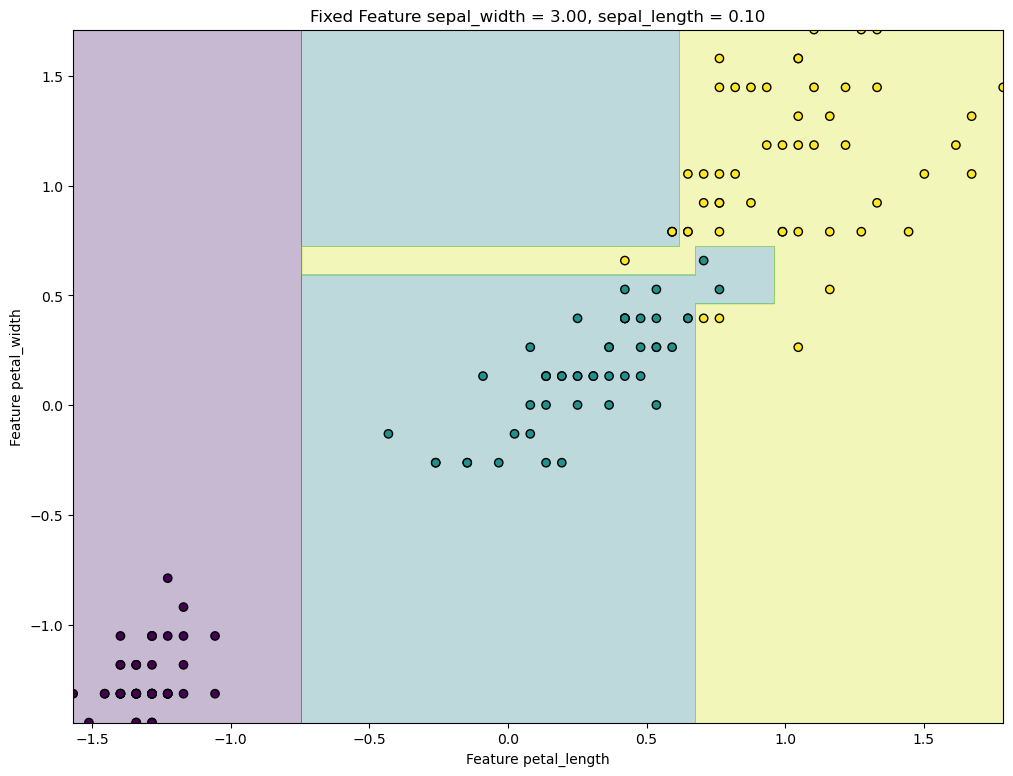

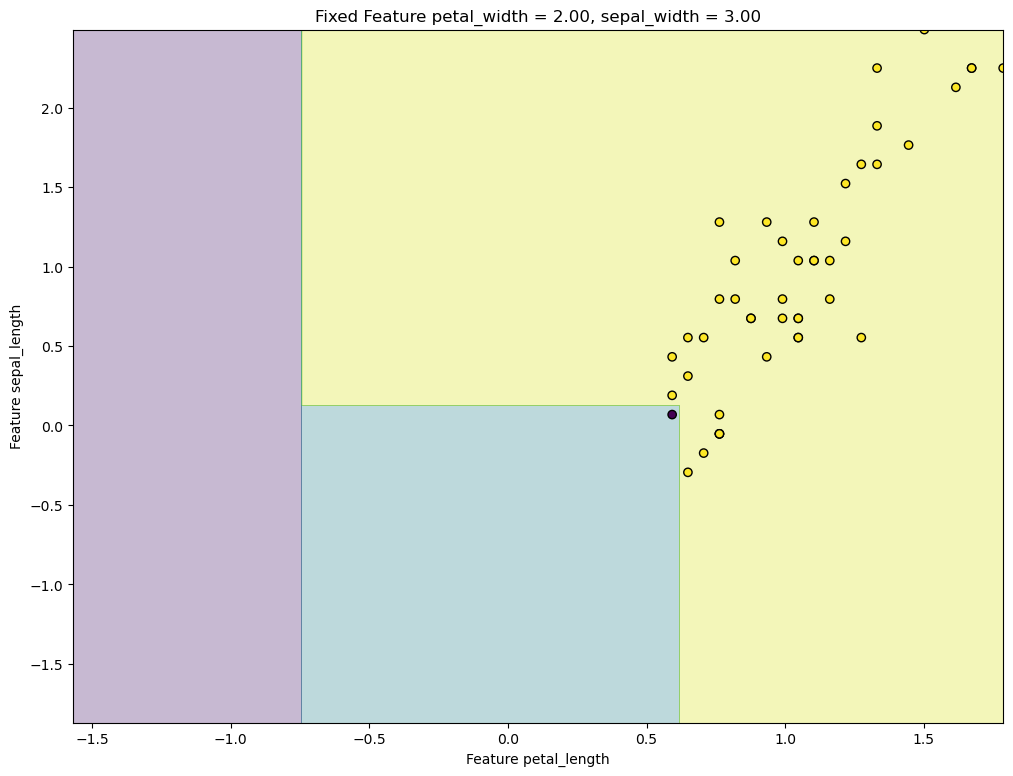

In [22]:
## TODO: Add code for visualising decision boundaries
from ml_nb_code import plot_decision_boundaries
fig, ax = plt.subplots(figsize=(12, 9))
plot_decision_boundaries(
    clf,
    iris_df,
    "petal_length",
    "petal_width",
    "sepal_width",
    3.0,
    "sepal_length",
    0.1,
    iris_feature_names,
    ax,
    x_lim=(iris_df.petal_length.min(), iris_df.petal_length.max()),
    y_lim=(iris_df.petal_width.min(), iris_df.petal_width.max()),
)
# t = iris_df.loc[(iris_df.sepal_length > 5.95) & (iris_df.petal_width > 1.75) & (iris_df.petal_length <= 4.85)]
# ax.scatter(t.petal_length, t.petal_width, c="r")

fig, ax = plt.subplots(figsize=(12, 9))
plot_decision_boundaries(
    clf,
    iris_df.loc[iris_df.petal_width > 0.725],
    "petal_length",
    "sepal_length",
    "petal_width",
    2.0,
    "sepal_width",
    3.0,
    iris_feature_names,
    ax,
    x_lim=(iris_df.petal_length.min(), iris_df.petal_length.max()),
    y_lim=(iris_df.sepal_length.min(), iris_df.sepal_length.max()),
)

## Overfitting and Underfitting

In [1]:
from ml_nb_code import linear_regression_fitting_example
linear_regression_fitting_example()

Output()

## Model Evaluation & Hyperparameters
- Measure the models performance on unseen data (i.e. not used during training)
- Commonly done by splitting avilable (labelled) data into a training and validation/testing set
- Commonly 80/20 split

#### Train/Validation Split
- Training set: used to train the model
- Validation set: used to evaluate the model


Training Accuracy: 1.00
Validation Accuracy: 0.90


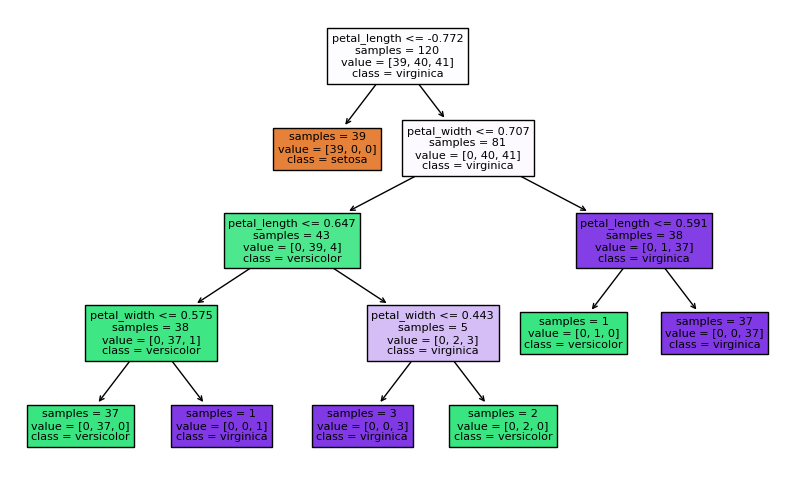

In [30]:
### Example
### TODO:
# - Find better dataset than iris, does not make the point particular well...
#   - Needs to show overfitting of default decision tree
# - Make interactive, show effect of validation data size
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from ml_nb_code import load_iris_df
np.random.seed(5)

iris_df, iris_feature_names = load_iris_df()

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(iris_df[iris_feature_names], iris_df["target"], test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

# Normalise the features
std_scaler = StandardScaler()
train_df[iris_feature_names] = std_scaler.fit_transform(train_df[iris_feature_names])
val_df[iris_feature_names] = std_scaler.transform(val_df[iris_feature_names])

# Encode the labels
label_encoder = LabelEncoder()
train_df["target_encoded"] = label_encoder.fit_transform(train_df["target"])
val_df["target_encoded"] = label_encoder.transform(val_df["target"])

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(train_df[iris_feature_names], train_df["target_encoded"])

# Get model predictions
train_y_pred = clf.predict(train_df[iris_feature_names])
val_y_pred = clf.predict(val_df[iris_feature_names])

# Calculate accuracy
train_accuracy = accuracy_score(train_df["target_encoded"], train_y_pred)
val_accuracy = accuracy_score(val_df["target_encoded"], val_y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, impurity=False, feature_names=iris_feature_names, class_names=label_encoder.inverse_transform(clf.classes_))
plt.show()

### Hyperparameters
- Parameters that are not learned during training
- Often highly relevant for overfitting/underfitting
    - E.g. Depth of Tree in Decision Tree

In [24]:
### TODO: 
### - Also needs better dataset (same as above), and more hyperparameters
### - And maybe some visualisation 
### - Also hide the code
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(iris_df[iris.feature_names], iris_df['target'], test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create widgets for hyperparameters
max_depth = widgets.IntSlider(value=3, min=1, max=10, step=1, description='Max Depth:')
min_samples_split = widgets.IntSlider(value=2, min=2, max=10, step=1, description='Min Samples Split:')
min_samples_leaf = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Min Samples Leaf:')

# Create an output widget to display the plot
output = widgets.Output()

# Define a function to update the plot
def update_plot(*args):
    with output:
        clear_output(wait=True)
        
        # Create a Decision Tree classifier with the selected hyperparameters
        clf = DecisionTreeClassifier(
            max_depth=max_depth.value,
            min_samples_split=min_samples_split.value,
            min_samples_leaf=min_samples_leaf.value,
            random_state=42
        )
        
        # Train the model on the training data
        clf.fit(X_train, y_train)
        
        # Get model predictions
        y_pred = clf.predict(X_val)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        print(f"Validation Accuracy: {accuracy:.2f}")
        
        # Visualize the decision tree
        plt.figure(figsize=(12, 8))
        plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
        plt.show()

# Attach the update_plot function to the widgets
max_depth.observe(update_plot, names='value')
min_samples_split.observe(update_plot, names='value')
min_samples_leaf.observe(update_plot, names='value')

# Display the widgets and the output plot
display(max_depth, min_samples_split, min_samples_leaf, output)

# Call the function initially to display the plot
update_plot()

IntSlider(value=3, description='Max Depth:', max=10, min=1)

IntSlider(value=2, description='Min Samples Split:', max=10, min=2)

IntSlider(value=1, description='Min Samples Leaf:', max=10, min=1)

Output()

### Cross Validation

## Hyperparameter Tuning
- What is it
- Example